In [163]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from IPython.display import SVG

from sklearn.metrics import r2_score


#from keras.utils.vis_utils import model_to_dot
#from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


from IPython.display import Image
import glob
import cv2
import random


from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam

In [164]:
my_Path = 'train_val/'

files = list(glob.glob(my_Path+'*.jpg'))
files
len(files)
files[0:5]

['train_val\\100_1_0_20170112215032192.jpg.chip.jpg',
 'train_val\\100_1_2_20170112213615815.jpg.chip.jpg',
 'train_val\\10_0_0_20161220222308131.jpg.chip.jpg',
 'train_val\\10_1_0_20170109203245653.jpg.chip.jpg',
 'train_val\\116_1_3_20170120134744096.jpg.chip.jpg']

In [180]:
df

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_49144,p_49145,p_49146,p_49147,p_49148,p_49149,p_49150,p_49151,Gender,Age
0,14,16,17,34,37,41,85,89,94,117,...,32,30,21,29,28,7,15,14,1,99
1,154,151,173,154,152,174,155,152,178,152,...,236,231,197,191,184,149,142,133,0,87
2,233,184,144,225,181,144,211,174,146,195,...,54,45,61,55,44,60,54,43,0,85
3,137,111,57,133,108,58,125,99,62,119,...,215,202,214,206,193,218,211,196,1,88
4,51,55,50,51,55,50,51,55,50,52,...,24,41,20,28,45,25,33,50,0,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,78,99,127,78,100,128,77,98,129,69,...,66,69,23,61,63,19,57,59,1,5
182,255,255,255,253,253,253,166,166,166,44,...,114,177,76,111,174,74,109,172,0,4
183,156,161,186,164,170,193,176,182,205,186,...,211,167,253,189,135,198,134,76,1,2
184,28,49,80,29,50,81,30,50,81,27,...,24,23,45,24,23,46,25,24,0,2


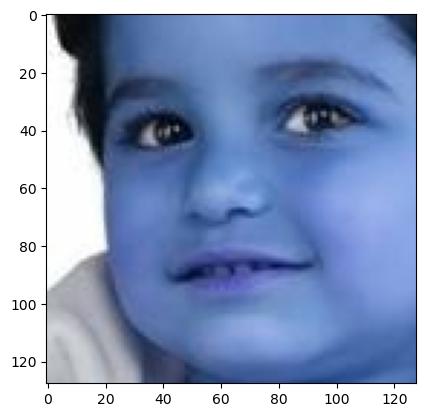

In [179]:
img = cv2.imread(files[89])
plt.imshow(img)

In [9]:
img.shape

(128, 128, 3)

In [166]:
df = pd.read_csv('df.csv', index_col= 0)

#df.loc[df['Gender'] == 1, 'Gender'] = True
#df.loc[df['Gender'] == 0, 'Gender'] = False

                 


In [173]:
df[df['p_0'] == 103]

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_49144,p_49145,p_49146,p_49147,p_49148,p_49149,p_49150,p_49151,Gender,Age
90,103,103,97,96,96,90,99,100,96,115,...,28,26,41,28,26,41,28,26,0,56
107,103,102,112,93,92,102,84,85,95,85,...,229,210,245,230,214,245,232,216,0,40


In [168]:
X   = df.drop(['Age', 'Gender'], axis = 1)
y = df['Gender']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [169]:
image_rows = 128
image_cols = 128
batch_size = 4096


image_shape = (image_rows,image_cols,3)
train_data = np.array(X_train, dtype = 'float32')
test_data = np.array(X_test, dtype='float32')


#x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [172]:
train_data = train_data.reshape(train_data.shape[0],*image_shape)
train_data[0]


array([[[103., 103.,  97.],
        [ 96.,  96.,  90.],
        [ 99., 100.,  96.],
        ...,
        [174., 168., 161.],
        [158., 149., 145.],
        [133., 124., 120.]],

       [[103., 103.,  97.],
        [101., 101.,  95.],
        [103., 104., 100.],
        ...,
        [172., 166., 159.],
        [162., 153., 149.],
        [142., 133., 129.]],

       [[103., 103.,  97.],
        [107., 107., 101.],
        [108., 109., 105.],
        ...,
        [168., 162., 155.],
        [165., 159., 154.],
        [154., 148., 143.]],

       ...,

       [[229., 209., 191.],
        [241., 221., 203.],
        [247., 226., 205.],
        ...,
        [ 41.,  28.,  26.],
        [ 41.,  28.,  26.],
        [ 42.,  29.,  27.]],

       [[210., 190., 173.],
        [233., 213., 195.],
        [240., 221., 200.],
        ...,
        [ 41.,  28.,  26.],
        [ 41.,  28.,  26.],
        [ 41.,  28.,  26.]],

       [[194., 174., 157.],
        [225., 205., 187.],
        [236., 2

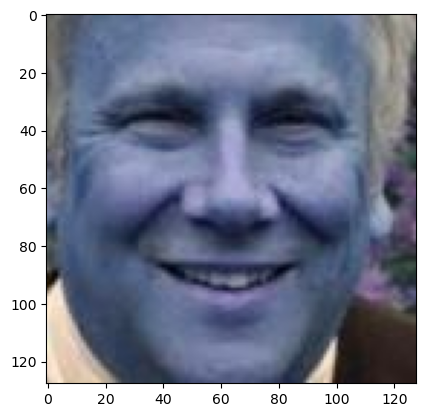

In [184]:
# how to check train / test data

cv2.imwrite('color_img.jpg', train_data[0])
img = cv2.imread("color_img.jpg")

plt.imshow(img)

In [123]:
train_data

array([[103., 103.,  97., ...,  41.,  28.,  26.],
       [ 93.,  92., 131., ...,  58.,  13.,   2.],
       [ 64.,  99., 142., ...,  88., 123., 167.],
       ...,
       [ 62.,  78., 121., ..., 143., 147., 165.],
       [ 99., 160., 192., ..., 201., 201., 201.],
       [ 87.,  96.,  99., ...,  75.,  88., 126.]], dtype=float32)

In [158]:
test_data[0]

array([105.,  71.,  41., ...,  39.,  23.,  24.], dtype=float32)

In [124]:
x_train = train_data/255

x_test= test_data/255

x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)

array([[[[0.40392157, 0.40392157, 0.38039216],
         [0.3764706 , 0.3764706 , 0.3529412 ],
         [0.3882353 , 0.39215687, 0.3764706 ],
         ...,
         [0.68235296, 0.65882355, 0.6313726 ],
         [0.61960787, 0.58431375, 0.5686275 ],
         [0.52156866, 0.4862745 , 0.47058824]],

        [[0.40392157, 0.40392157, 0.38039216],
         [0.39607844, 0.39607844, 0.37254903],
         [0.40392157, 0.40784314, 0.39215687],
         ...,
         [0.6745098 , 0.6509804 , 0.62352943],
         [0.63529414, 0.6       , 0.58431375],
         [0.5568628 , 0.52156866, 0.5058824 ]],

        [[0.40392157, 0.40392157, 0.38039216],
         [0.41960785, 0.41960785, 0.39607844],
         [0.42352942, 0.42745098, 0.4117647 ],
         ...,
         [0.65882355, 0.63529414, 0.60784316],
         [0.64705884, 0.62352943, 0.6039216 ],
         [0.6039216 , 0.5803922 , 0.56078434]],

        ...,

        [[0.8980392 , 0.81960785, 0.7490196 ],
         [0.94509804, 0.8666667 , 0.79607844]

In [126]:
y_train

90     0
66     1
38     1
55     1
98     0
      ..
106    0
14     1
92     1
179    0
102    0
Name: Gender, Length: 139, dtype: int64

In [127]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = (128, 128, 3)),
    MaxPooling2D(pool_size=2) ,
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(1, activation='sigmoid')
    
])


cnn_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

import tensorflow
x_train = tensorflow.convert_to_tensor(x_train, dtype=tf.float32) 
x_test = tensorflow.convert_to_tensor(x_test, dtype=tf.float32) 

c:\Users\SHEKHAR\.conda\envs\aws\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [128]:
import tensorflow
x_train = tensorflow.convert_to_tensor(x_train, dtype=tf.float32) 

In [136]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=100,
    verbose=1,
    validation_data=(x_test,y_test),
)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - binary_accuracy: 0.6475 - loss: 0.6408 - val_binary_accuracy: 0.5745 - val_loss: 0.6599
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - binary_accuracy: 0.7122 - loss: 0.6148 - val_binary_accuracy: 0.5319 - val_loss: 0.6574
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - binary_accuracy: 0.7122 - loss: 0.6019 - val_binary_accuracy: 0.5957 - val_loss: 0.6719
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - binary_accuracy: 0.6835 - loss: 0.5979 - val_binary_accuracy: 0.5745 - val_loss: 0.6818
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - binary_accuracy: 0.6835 - loss: 0.5999 - val_binary_accuracy: 0.5957 - val_loss: 0.6716
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - binary_accuracy: 0.7122 - loss: 0.5860 - val_binary_accuracy: 0.5957 - val_loss: 0.6544
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - binary_accuracy: 0.7338 - loss: 0.5772 - val_binary_accuracy: 0.5745 - val_loss: 0.6466
Epoch 8/100
1

In [134]:
history.history.keys()

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

Text(0.5, 1.0, 'Train - Accuracy')

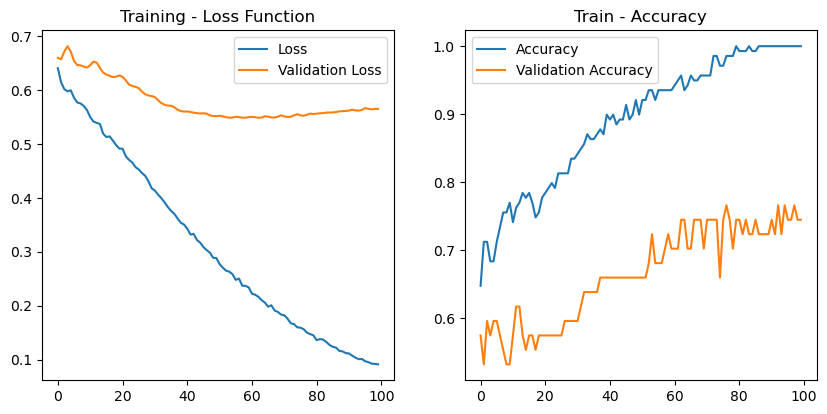

In [137]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['binary_accuracy'], label='Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

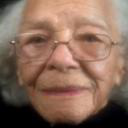

In [140]:
files[0]
PIL.Image.open(str(files[0]))

In [142]:
cv2.imread(files[0])

array([[[ 13,  16,  14],
        [ 11,  14,  12],
        [ 10,  13,  11],
        ...,
        [165, 170, 161],
        [161, 166, 157],
        [158, 163, 154]],

       [[ 15,  18,  16],
        [ 16,  19,  17],
        [ 17,  20,  18],
        ...,
        [167, 172, 163],
        [163, 168, 159],
        [160, 165, 156]],

       [[ 13,  16,  14],
        [ 15,  18,  16],
        [ 18,  21,  19],
        ...,
        [171, 176, 167],
        [164, 172, 162],
        [160, 168, 158]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [146]:
x_test[0]

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.4117647 , 0.2784314 , 0.16078432],
        [0.40392157, 0.27058825, 0.15686275],
        [0.4       , 0.26666668, 0.17254902],
        ...,
        [0.21960784, 0.21960784, 0.26666668],
        [0.22745098, 0.22352941, 0.2627451 ],
        [0.23137255, 0.22745098, 0.26666668]],

       [[0.38431373, 0.2509804 , 0.13333334],
        [0.38039216, 0.24705882, 0.13333334],
        [0.38431373, 0.2509804 , 0.15686275],
        ...,
        [0.21960784, 0.21960784, 0.26666668],
        [0.22745098, 0.22352941, 0.2627451 ],
        [0.23137255, 0.22745098, 0.26666668]],

       [[0.3764706 , 0.24313726, 0.1254902 ],
        [0.37254903, 0.23921569, 0.1254902 ],
        [0.3764706 , 0.24313726, 0.14901961],
        ...,
        [0.21960784, 0.21960784, 0.26666668],
        [0.22745098, 0.22352941, 0.2627451 ],
        [0.23137255, 0.22745098, 0.26666668]],

       ...,

       [[0.42745098, 0.27058825, 0.17254902],
        [0.42

In [149]:
cnn_model.predict(x_test).shape

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


(47, 1)

In [110]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [69]:
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


In [70]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


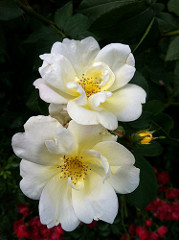

In [71]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

In [72]:
data_dir

WindowsPath('C:/Users/SHEKHAR/.keras/datasets/flower_photos')

In [73]:
roses[0]

WindowsPath('C:/Users/SHEKHAR/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

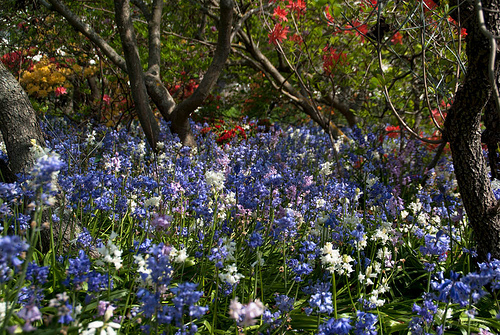

In [75]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))
PIL.Image.open(str(tulips[1]))

In [76]:
batch_size = 32
img_height = 180
img_width = 180

In [97]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [98]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [99]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [100]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [85]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'E:\Projects\Multi-CNN',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(128, 128),
  batch_size=batch_size)

Found 186 files belonging to 1 classes.


Using 149 files for training.


In [106]:
type(train_ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [108]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [109]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [91]:
normalization_layer = layers.Rescaling(1./255)

In [92]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.99803925


In [101]:

num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

c:\Users\SHEKHAR\.conda\envs\aws\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [102]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [103]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [104]:
epochs=2
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 203ms/step - accuracy: 0.3679 - loss: 1.4474 - val_accuracy: 0.5422 - val_loss: 1.0912
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 232ms/step - accuracy: 0.6033 - loss: 1.0045 - val_accuracy: 0.6172 - val_loss: 0.9375
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 236ms/step - accuracy: 0.6956 - loss: 0.8192 - val_accuracy: 0.6567 - val_loss: 0.9039
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 244ms/step - accuracy: 0.7434 - loss: 0.6759 - val_accuracy: 0.6390 - val_loss: 0.9451
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 244ms/step - accuracy: 0.8315 - loss: 0.4683 - val_accuracy: 0.6417 - val_loss: 1.0366
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 242ms/step - accuracy: 0.9024 - loss: 0.2842 - val_accuracy: 0.6649 - val_loss: 1.2249
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 238ms/step - accuracy: 0.9352 - loss: 0.1909 - val_accuracy: 0.6662 - val_loss: 1.4323
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 239ms/step - accuracy: 0.9636 - loss: 0.1074 - val_accu

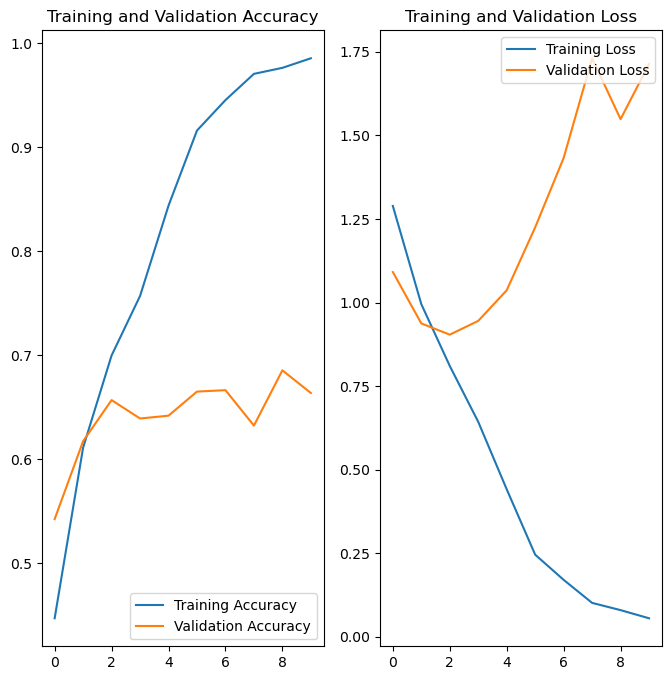

In [105]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()